In [517]:
from keras.models import Model
import keras.models
import keras.layers as layers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from keras import backend as K
from keras_contrib.layers.normalization import InstanceNormalization

import argparse
import capsulenet as cnet
import cnn_analyzer as cnna
import cnn_builder as cbuild
import cnn_runner as crun
import config
import csv
import niftiutils.helper_fxns as hf
import importlib
import matplotlib.pyplot as plt
import numpy as np
import operator
import os
import pandas as pd
import random
%matplotlib inline

In [4]:
importlib.reload(cnet)
importlib.reload(config)
importlib.reload(crun)
importlib.reload(hf)
importlib.reload(cbuild)
C = config.Config()
T = config.Hyperparams()
T.get_best_hyperparams()

In [3]:
train_generator, (x_test, y_test), _ = cbuild.load_data_capsnet()
(x_train, y_train), _ = next(train_generator)

In [4]:
parser = argparse.ArgumentParser()
parser.add_argument('strings', metavar='STRING', nargs='*', help='String for searching')
parser.add_argument('--epochs', default=50, type=int)
parser.add_argument('--batch_size', default=2, type=int)
parser.add_argument('--lr', default=0.001, type=float,
                    help="Initial learning rate")
parser.add_argument('--lr_decay', default=0.9, type=float,
                    help="The value multiplied by lr at each epoch. Set a larger value for larger epochs")
parser.add_argument('--lam_recon', default=0.392, type=float,
                    help="The coefficient for the loss of decoder")
parser.add_argument('-r', '--routings', default=3, type=int,
                    help="Number of iterations used in routing algorithm. should > 0")
#parser.add_argument('--shift_fraction', default=0.1, type=float,
#                    help="Fraction of pixels to shift at most in each direction.")
parser.add_argument('--debug', action='store_true',
                    help="Save weights by TensorBoard")
parser.add_argument('--save_dir', default='./result')
parser.add_argument('-t', '--testing', action='store_true',
                    help="Test the trained model on testing dataset")
parser.add_argument('--digit', default=5, type=int,
                    help="Digit to manipulate")
parser.add_argument('-w', '--weights', default=None,
                    help="The path of the saved weights. Should be specified when testing")
args = parser.parse_args('--epochs 50')# --lr 0.002 --lr_decay 0.87')

In [ ]:
importlib.reload(cnet)

model, eval_model = cnet.build_capsnet(input_shape=x_train.shape[1:],
                                              n_class=len(np.unique(np.argmax(y_train, 1))),
                                              routings=args.routings)
model.summary()

In [ ]:
cnet.train(model=model, data=(train_generator, (x_test, y_test)), args=args)

In [24]:
model.save('E:\\trained_model2.h5')

In [27]:
#model = keras.models.load_model('E:\\trained_model2.h5')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 24, 24, 12, 3 0                                            
__________________________________________________________________________________________________
conv1 (Conv3D)                  (None, 17, 17, 5, 25 393472      input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_7 (BatchNor (None, 17, 17, 5, 25 1024        conv1[0][0]                      
__________________________________________________________________________________________________
activation_6 (Activation)       (None, 17, 17, 5, 25 0           batch_normalization_7[0][0]      
__________________________________________________________________________________________________
primarycap

In [ ]:
model = keras.models.load_model('E:\\trained_model2.h5')
#eval_model.load_weights('result2\\weights-35.h5')
#manipulate_model.load_weights('result2\\weights-35.h5')

In [51]:
model.load_weights('./result/weights-35.h5')

In [ ]:
importlib.reload(cnet)
for i in range(6):
    cnet.manipulate_latent(manipulate_model, (x_test, y_test), args, i, multislice=False)

In [ ]:
importlib.reload(cnet)
cnet.test(model=eval_model, data=(x_test, y_test), args=args)

In [ ]:
a = layers.Input([28,28,1])
x = layers.Conv2D(4,kernel_size=9,strides=1)(a)
x = layers.Conv2D(4,kernel_size=9,strides=2)(x)
b = x
model = Model(a,b)
model.summary(150)

In [40]:
a = layers.Input(shape=[24,24,12,3])
x = InstanceNormalization(axis=4)(a)
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.Reshape(target_shape=(128,1,1,1,1))(x)
x = layers.TimeDistributed(layers.Conv3DTranspose(filters=64, kernel_size=[11,11,6], strides=1, padding='valid', activation='relu'))(x)
x = layers.TimeDistributed(layers.Conv3DTranspose(filters=64, kernel_size=[4,4,2], strides=2, padding='valid', activation='relu'))(x)
#x = layers.Reshape((3, 24, 24, 12))(x)
#x = layers.Permute((2,3,4,1))(x)
b = x
model = Model(a,b)

model.summary(100)

____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_51 (InputLayer)                        (None, 24, 24, 12, 3)                   0              
____________________________________________________________________________________________________
instance_normalization_3 (InstanceNormalizat (None, 24, 24, 12, 3)                   6              
____________________________________________________________________________________________________
flatten_10 (Flatten)                         (None, 20736)                           0              
____________________________________________________________________________________________________
dense_34 (Dense)                             (None, 128)                             2654336        
___________________________________________________________________________________________

C_list = [config.Config(), config.Config()]
C_list[0].dims = [36,36,12]
C_list[1].dims = [24,24,12]
C_list[0].artif_dir = "E:\\imgs\\artif_imgs_3612\\"
C_list[1].artif_dir = "E:\\imgs\\artif_imgs_2412\\"
C_list[0].aug_dir = "E:\\imgs\\aug_imgs_3612_cropint\\"
C_list[1].aug_dir = "E:\\imgs\\aug_imgs_2412_cropint\\"
C_list[0].orig_dir = "E:\\imgs\\orig_imgs_3612_cropint\\"
C_list[1].orig_dir = "E:\\imgs\\orig_imgs_2412_cropint\\"

In [68]:
Z_reader = ['E103312835_1','12823036_0','12569915_0','E102093118_0','E102782525_0','12799652_0','E100894274_0','12874178_3','E100314676_0','12842070_0','13092836_2','12239783_0','12783467_0','13092966_0','E100962970_0','E100183257_1','E102634440_0','E106182827_0','12582632_0','E100121654_0','E100407633_0','E105310461_0','12788616_0','E101225606_0','12678910_1','E101083458_1','12324408_0','13031955_0','E101415263_0','E103192914_0','12888679_2','E106096969_0','E100192709_1','13112385_1','E100718398_0','12207268_0','E105244287_0','E102095465_0','E102613189_0','12961059_0','11907521_0','E105311123_0','12552705_0','E100610622_0','12975280_0','E105918926_0','E103020139_1','E101069048_1','E105427046_0','13028374_0','E100262351_0','12302576_0','12451831_0','E102929168_0','E100383453_0','E105344747_0','12569826_0','E100168661_0','12530153_0','E104697262_0']

In [76]:
importlib.reload(cnet)
importlib.reload(config)
importlib.reload(hf)
importlib.reload(cbuild)
importlib.reload(crun)
C = config.Config()
T = config.Hyperparams()
#T.steps_per_epoch = 50
#T.epochs= 1
#T.get_best_hyperparams()

In [ ]:
crun.run_fixed_hyperparams([C], hyperparams=T)#C_list)

orig_data_dict, num_samples = cbuild._collect_unaug_data()

In [ ]:
model = cbuild.build_cnn_hyperparams(T)
model.summary(line_length=150)

In [4]:
X_test, Y_test, train_generator, num_samples, train_orig, Z = cbuild.get_cnn_data(n=4, n_art=0)#, Z_test_fixed=Z_reader)
Z_test, Z_train_orig = Z
X_train_orig, Y_train_orig = train_orig

In [59]:
#from keras.utils import multi_gpu_model
#model = multi_gpu_model(model, gpus=2)

In [ ]:
hist = model.fit_generator(train_generator, steps_per_epoch=T.steps_per_epoch, epochs=T.epochs, validation_data=[X_test, Y_test])#, callbacks=[T.early_stopping])

In [71]:
model.save('E:\\models\\model_reader_rcnn.hdf5')

In [72]:
import dr_methods as drm
voi_df_art, voi_df_ven, voi_df_eq = drm.get_voi_dfs()
small_voi_df = pd.read_csv(C.small_voi_path)

In [ ]:
#plot_with_bbox(fn_list[2], cls_mapping[wrong_guesses[2]])
Y_pred = model.predict(X_test)
y_true = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_test])
y_pred = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_pred])

cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average="weighted")

#save_output(Z_test, y_pred, y_true)

print(accuracy_score(y_true, y_pred))
#y_true_simp, y_pred_simp, _ = cnna.merge_classes(y_true, y_pred)
#print(accuracy_score(y_true_simp, y_pred_simp))

In [3]:
model = keras.models.load_model(os.path.join(C.model_dir, "models_305.hdf5")) #models_305

In [344]:
importlib.reload(cbuild)

<module 'cnn_builder' from 'C:\\Users\\Clinton\\Documents\\voi-classifier\\python\\cnn_builder.py'>

In [312]:
X_test, Y_test, train_generator, num_samples, train_orig, Z = cbuild.get_cnn_data(n=4, n_art=0, Z_test=Z_reader)
Z_test, Z_train_orig = Z
Y_pred = model.predict(X_test)
y_true = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_test])
y_pred = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_pred])
y_true_simp, y_pred_simp, _ = cbuild.merge_classes(y_true, y_pred)

In [42]:
Y_pred = [C.classes_to_include[y] for y in y_pred]
Y_true = [C.classes_to_include[y] for y in y_true]

In [43]:
a = pd.DataFrame([Z_test,Y_pred,Y_true])

In [45]:
a.to_csv('E:\\temp.csv')

In [205]:
acc6cls = []
acc3cls = []

for i in range(19):
    model_num = 306+i
    X_test, Y_test, train_generator, num_samples, train_orig, Z = cbuild.get_cnn_data(n=4, n_art=0, Z_test=df[df['model_num'] == model_num]["z_test"])
    X_train_orig, Y_train_orig = train_orig
    model = keras.models.load_model(os.path.join(C.model_dir, "models_%d.hdf5" % model_num)) #models_305
    
    Y_pred = model.predict(X_train_orig)
    y_true = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_train_orig])
    y_pred = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_pred])

    acc6cls.append(accuracy_score(y_true, y_pred))

    y_true_simp, y_pred_simp, _ = cbuild.merge_classes(y_true, y_pred)

    acc3cls.append(accuracy_score(y_true_simp, y_pred_simp))

In [22]:
df = pd.read_excel("Z:\\Inter-reader study\\Answer key.xlsx")

In [23]:
y_true = df["Class"].values
y_pred = df["Model"].values

In [24]:
cm = confusion_matrix(y_true, y_pred, labels=C.classes_to_include)

In [46]:
for i in range(len(cm)):
    print('\t'.join(cm[:,i].astype(str)))

10	0	1	0	0	1
0	9	1	0	0	0
0	1	8	0	0	0
0	0	0	10	0	0
0	0	0	0	9	0
0	0	0	0	1	9


In [72]:
fn_list = fn_list + list(Z_test[~np.equal(y_pred, y_true)])

In [74]:
fn_list = fn_list + list(Z_train_orig[~np.equal(y_pred, y_true)])
fn_list = fn_list + list(Z_train_orig[~np.equal(y_pred, y_true)])

In [75]:
fn_x_list = [x+"("+str(voi_df_art[voi_df_art["id"] == x[:-4]]["x1"].values[0])+")" for x in fn_list]

In [76]:
unique, counts = np.unique(fn_x_list, return_counts=True)

In [ ]:
dict(zip(unique, counts))

In [195]:
Y_pred = model.predict(X_train_orig)
y_true = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_train_orig])
y_pred = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_pred])

cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average="weighted")

#cbuild.save_output(Z_train_orig, y_pred, y_true)#, save_dir=C.output_img_dir+"\\training")

In [5]:
model = keras.models.load_model(os.path.join(C.model_dir, "models_305.hdf5")) #models_305
#cnna.visualize_layer(model, 'conv3d_148')

In [6]:
importlib.reload(cbuild)

<module 'cnn_builder' from 'C:\\Users\\Clinton\\Documents\\voi-classifier\\python\\cnn_builder.py'>

In [6]:
model_dense_outputs = cbuild.build_pretrain_model(model)

In [ ]:
model_dropout = cbuild.build_model_forced_dropout(model, )

In [7]:
orig_data_dict, num_samples = cbuild._collect_unaug_data()

In [8]:
filters_by_cls = {cls: model_dense_outputs.predict(orig_data_dict[cls][0], verbose=False) for cls in C.classes_to_include}

C:\Users\Clinton\AppData\Local\conda\conda\envs\old-keras\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


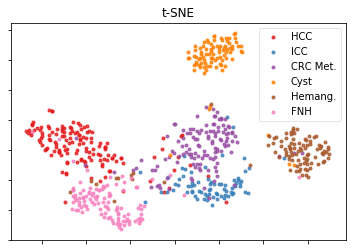

In [10]:
fig = cnna.tsne(filters_by_cls)
fig.show()